In [1]:
import pandas as pd
import numpy as np
# Specify the path to your CSV file
file_path = 'sample_data/sample_virus_abundance.csv' #
# Read the CSV file into a DataFrame
data = pd.read_csv(file_path, sep=',', header=None)
array = data.to_numpy()


In [2]:
#extract the data
sampleId = array[1:,0] #megagenomic sample ID
abundance = np.asarray(array[1:,12:], dtype=float) #values of virus absolute abundance
ecotype = array[1:,1] #ecotype
ecological_features = np.asarray(array[1:,2:11], dtype=float) #values of climate factors
ecological_features_name = array[0,2:11] #name of climate factors
diversity = np.asarray(array[1:,11], dtype=float) #virome diversity


explained variance ratio (PCA first two components): [0.11085358 0.04451011]
explained variance ratio (LDA first two components): [0.45709294 0.27094965]


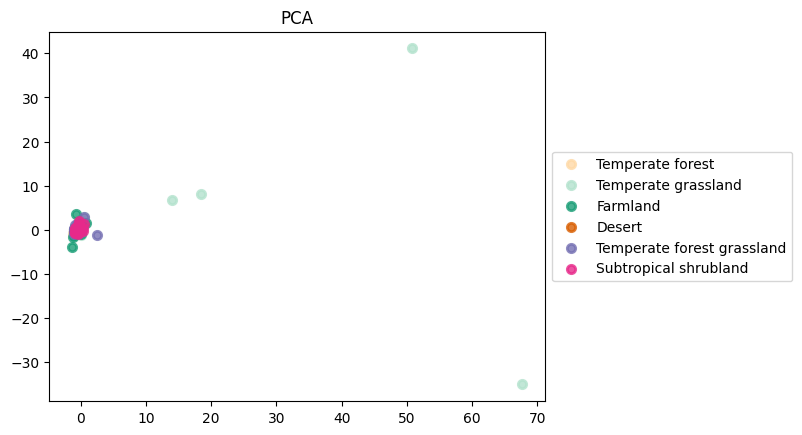

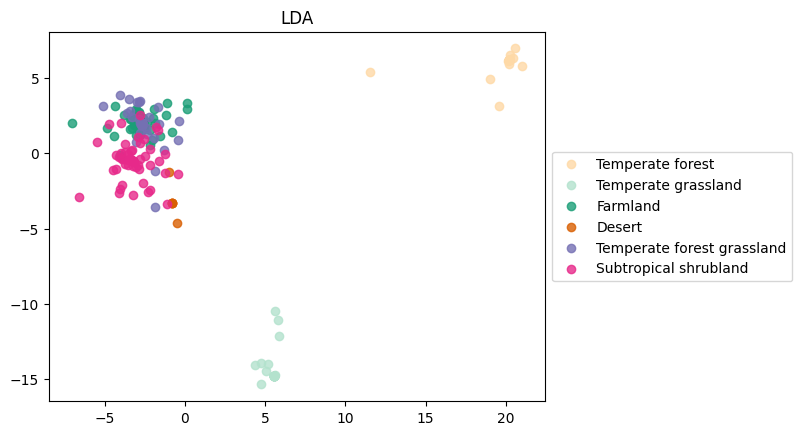

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing

X = abundance
y = ecotype

#X = np.transpose(X)
#scaler = preprocessing.StandardScaler().fit(X)
#X = scaler.transform(X)
#X = np.transpose(X)

target_names = list(set(ecotype))
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
X_r.shape

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (PCA first two components): %s"
    % str(pca.explained_variance_ratio_)
)

print(
    "explained variance ratio (LDA first two components): %s"
    % str(lda.explained_variance_ratio_)
)

plt.figure()
#colors = ["navy", "turquoise", "darkorange"]
colors = ["#FED9A6","#B3E2CD","#1B9E77", "#D95F02", "#7570B3", "#E7298A"]
lw = 2

for color, target_name in zip(colors, target_names):
    plt.scatter(
        X_r[y == target_name, 0], X_r[y == target_name, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=False, scatterpoints=1)
plt.title("PCA")

plt.figure()
for color, target_name in zip(colors, target_names):
    plt.scatter(
        X_r2[y == target_name, 0], X_r2[y == target_name, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=False, scatterpoints=1)
plt.title("LDA")

plt.show()

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'Desert'),
  Text(2, 0, 'Farmland'),
  Text(3, 0, 'Subtropical shrubland'),
  Text(4, 0, 'Temperate forest'),
  Text(5, 0, 'Temperate forest grassland'),
  Text(6, 0, 'Temperate grassland')])

<Figure size 1000x600 with 0 Axes>

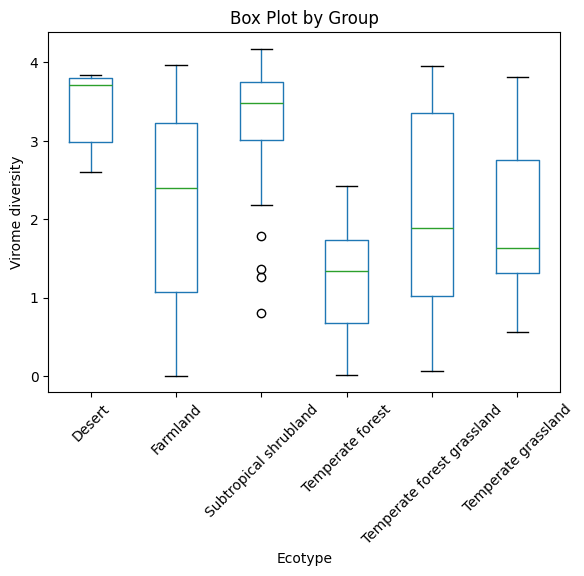

In [5]:
# Create a box plot for visualization
box_data = {
    'value': diversity,  
    'group': ecotype  
}
# Create a DataFrame
df = pd.DataFrame(box_data)
plt.figure(figsize=(10, 6))
box_plot = df.boxplot(column='value', by='group', grid=False)
plt.title('Box Plot by Group')
plt.suptitle('')
plt.xlabel('Ecotype')
plt.ylabel('Virome diversity')
plt.xticks(rotation=45)

C:\Users\yytao\AppData\Local\Temp\ipykernel_1832\2522821528.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_data);
C:\Users\yytao\AppData\Local\Temp\ipykernel_1832\2522821528.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_data);
C:\Users\yytao\AppData\Local\Temp\ipykernel_18

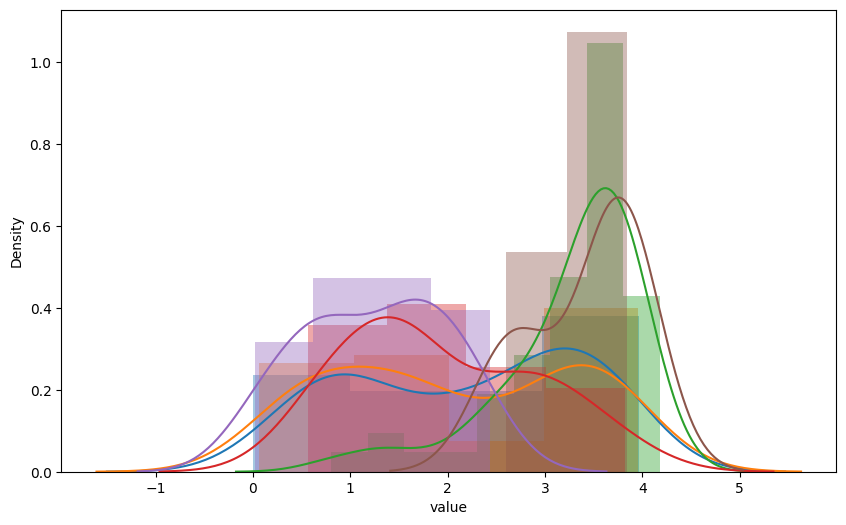

In [194]:
#check the distribution of the data
import seaborn as sns
plt.figure(figsize=(10, 6))
groups = df['group'].unique()
for group in  groups:
    test_data = df[df['group'] == group]['value']
    sns.distplot(test_data);


In [195]:

from scipy.stats import ranksums
from itertools import combinations

alpha = 0.05
for group1, group2 in combinations(groups, 2):  
    data1 = df[df['group'] == group1]['value']
    data2 = df[df['group'] == group2]['value']
    statistic, p_value = ranksums(data1, data2) #Wilcoxon rank-sum
    if p_value < alpha:
        print(f'{group1} vs {group2} is significantly different')
    else:
        print(f'{group1} vs {group2} is not significantly different')


Farmland vs Temperate forest grassland is not significantly different
Farmland vs Subtropical shrubland is significantly different
Farmland vs Temperate grassland is not significantly different
Farmland vs Temperate forest is significantly different
Farmland vs Desert is significantly different
Temperate forest grassland vs Subtropical shrubland is significantly different
Temperate forest grassland vs Temperate grassland is not significantly different
Temperate forest grassland vs Temperate forest is significantly different
Temperate forest grassland vs Desert is significantly different
Subtropical shrubland vs Temperate grassland is significantly different
Subtropical shrubland vs Temperate forest is significantly different
Subtropical shrubland vs Desert is not significantly different
Temperate grassland vs Temperate forest is significantly different
Temperate grassland vs Desert is significantly different
Temperate forest vs Desert is significantly different


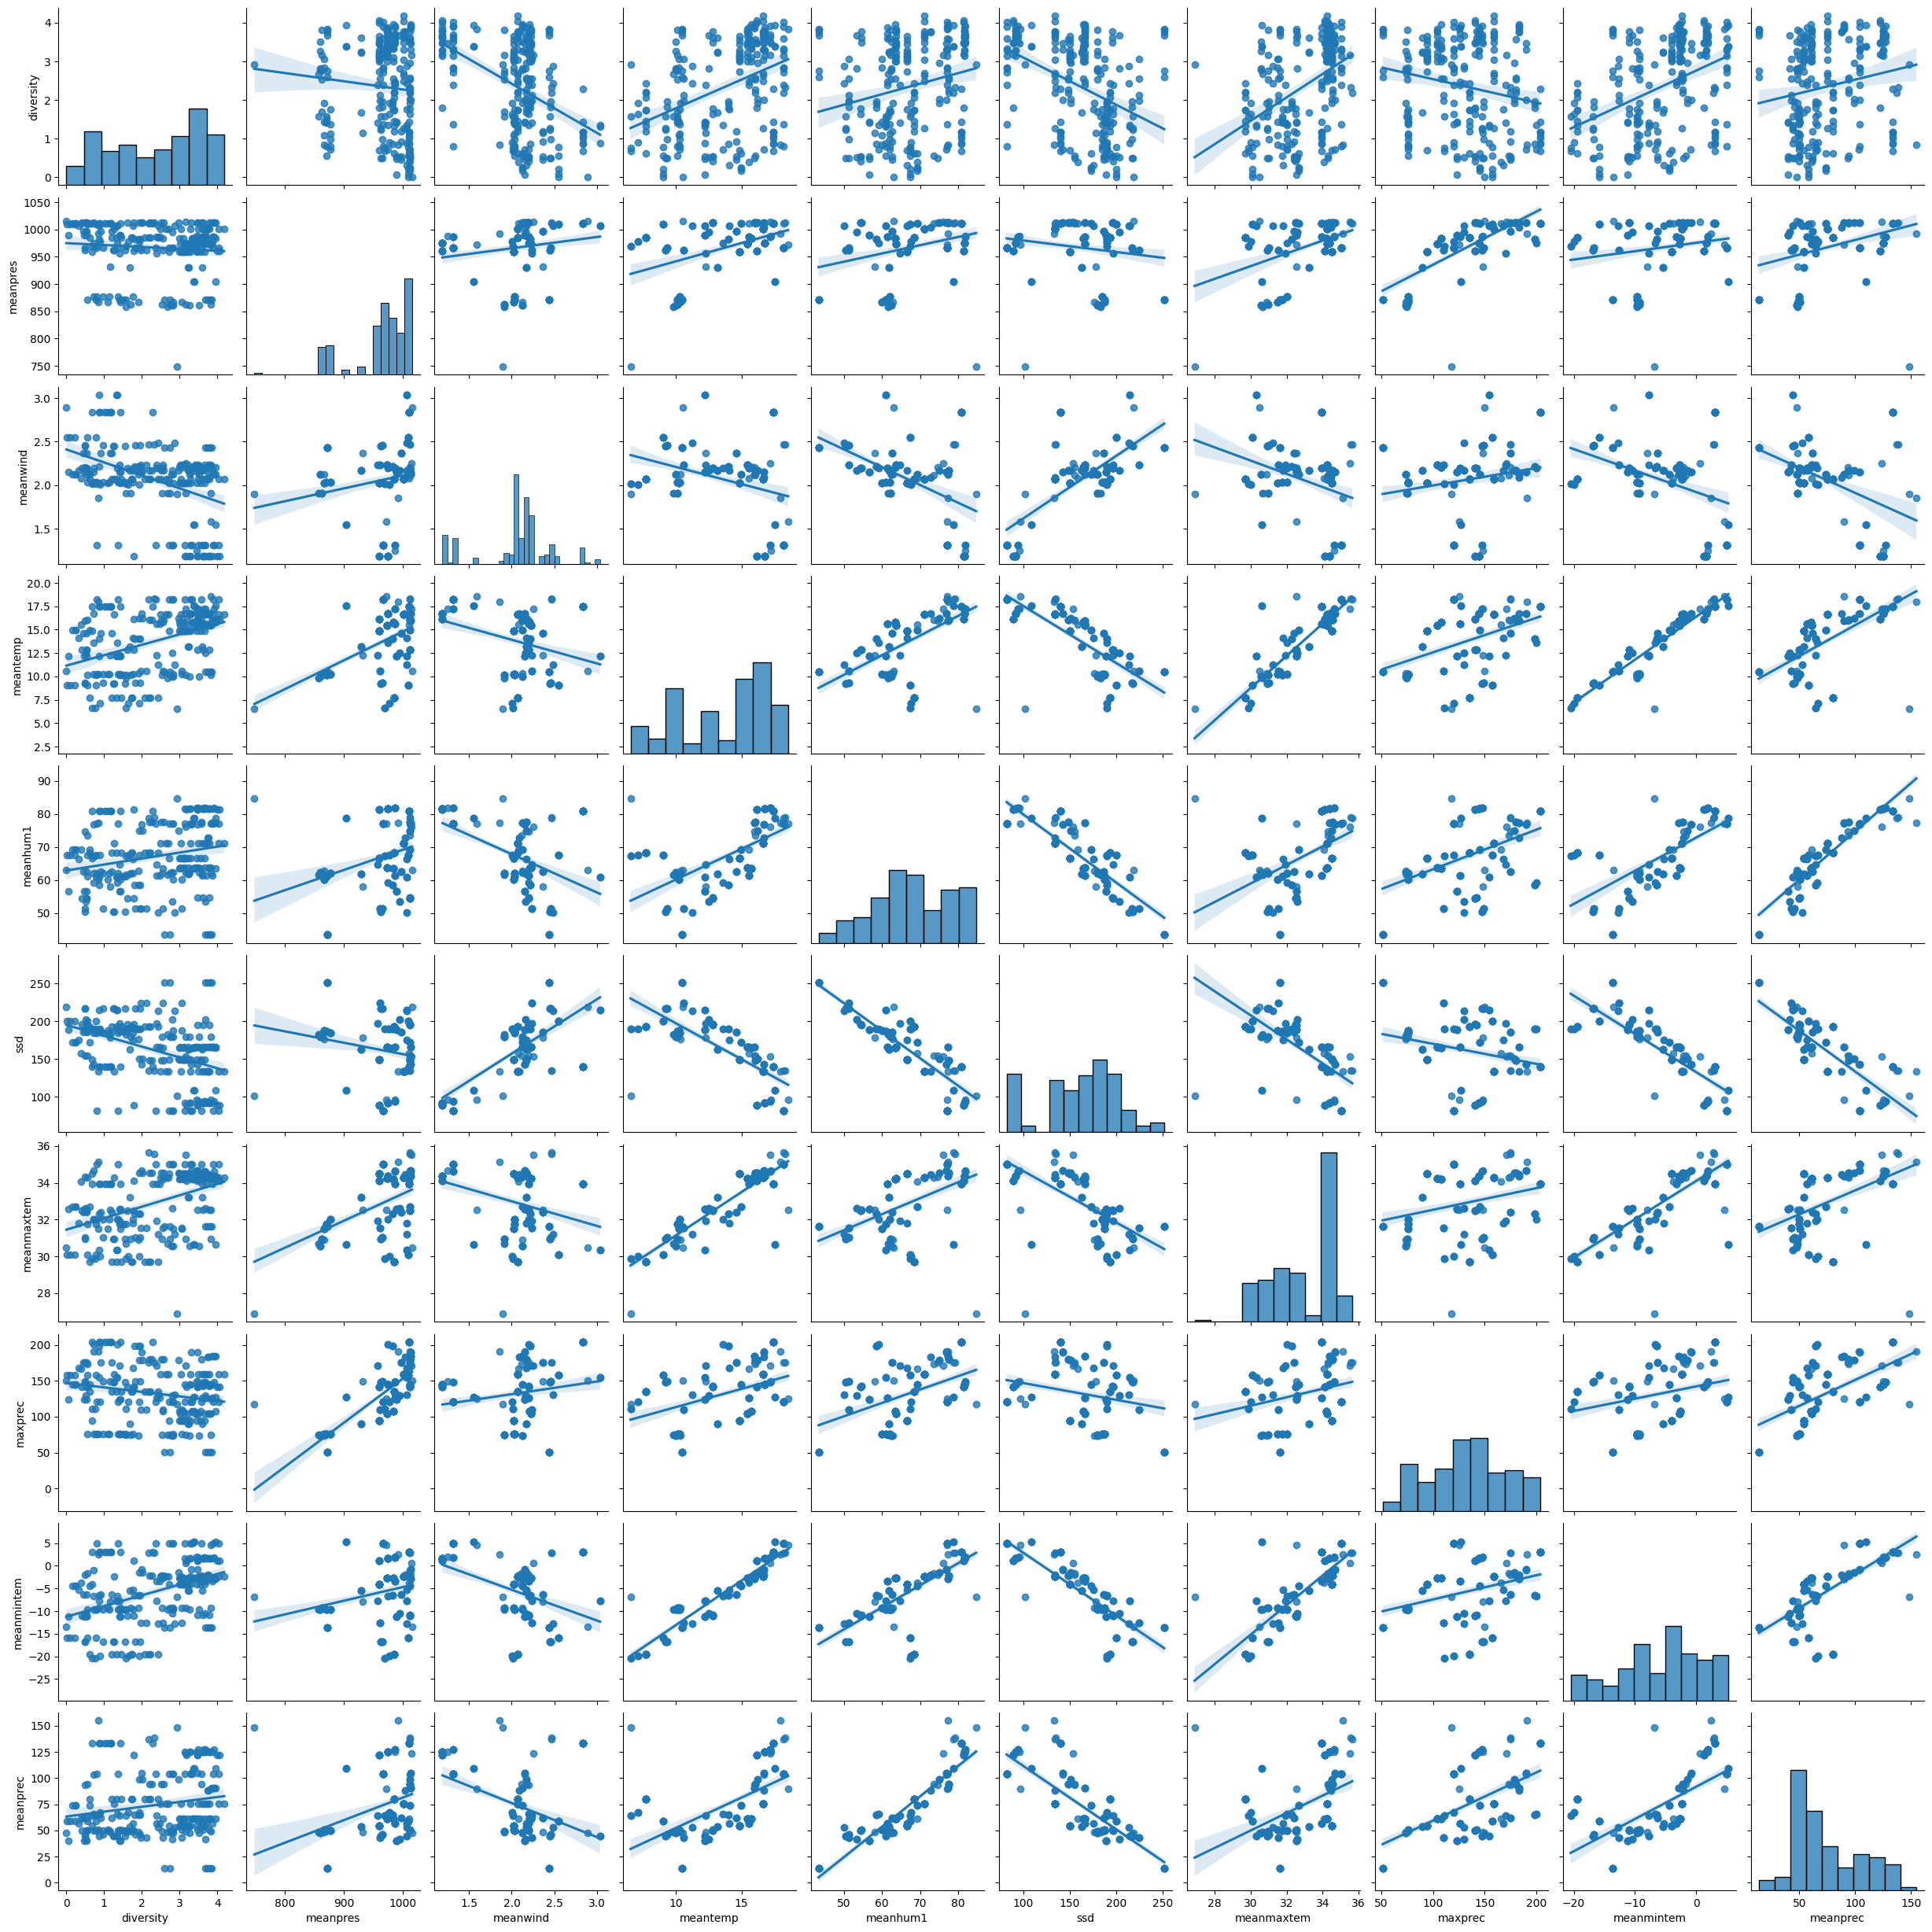

In [196]:

import seaborn as sns
diversity_reshaped = diversity.reshape(len(diversity), 1)

df = pd.DataFrame(np.hstack((diversity_reshaped, ecological_features)), columns=np.concatenate((['diversity'] , ecological_features_name)))
# with regression
sns.pairplot(df, kind="reg")
plt.show()

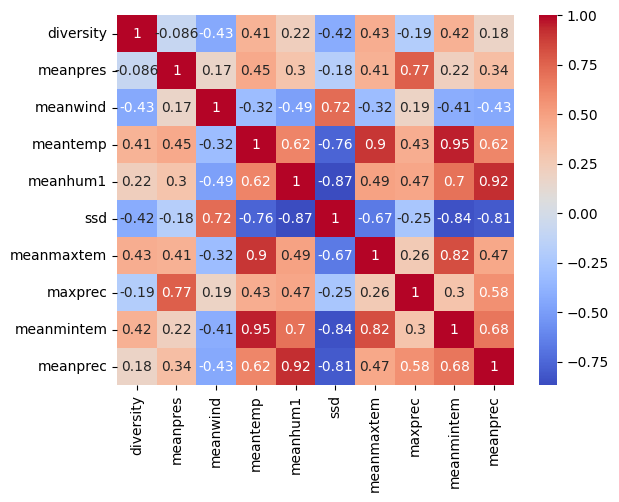

In [197]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [198]:
print(df.describe())

        diversity     meanpres    meanwind    meantemp    meanhum1  \
count  238.000000   238.000000  238.000000  238.000000  238.000000   
mean     2.343667   966.937491    2.061463   13.762765   67.105650   
std      1.200587    48.717562    0.411879    3.297322    9.794033   
min      0.004639   748.442017    1.185620    6.541400   43.348099   
25%      1.281196   960.052521    2.024990   10.468900   61.349800   
50%      2.548935   977.416016    2.121540   14.830700   66.502098   
75%      3.466130  1001.849976    2.214320   16.634600   77.025002   
max      4.176801  1016.179993    3.040120   18.561001   84.701500   

              ssd  meanmaxtem     maxprec  meanmintem    meanprec  
count  238.000000  238.000000  238.000000  238.000000  238.000000  
mean   161.728933   32.912133  132.334224   -5.720055   74.113516  
std     41.127538    1.725686   38.647206    6.808218   30.865474  
min     82.018799   26.879900   51.153301  -20.489300   13.755100  
25%    139.736999   31.570051

In [199]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

#Setting the value for X and Y
X = df[['meantemp', 'meanwind', 'meanpres', 'meanhum1', 'meanprec']]
y = df['diversity']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
reg_model = linear_model.LinearRegression()
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

#R2 (coefficient of determination) regression score function.
y_pred = reg_model.predict(X_train)  
metrics.r2_score(y_train, y_pred)


0.36778373271262277

In [200]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)


Mean Absolute Error: 0.8681474878012995
Mean Square Error: 1.092316797489556


In [201]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
69,0.064227,2.232804
182,2.928449,0.909557
64,2.495493,2.841878
97,3.916474,3.235514
219,3.482869,2.125357
...,...,...
146,0.503747,1.312952
88,3.354338,2.739222
104,3.780446,3.334306
207,3.119224,2.890076
